In [1]:
from sklearn.linear_model import ElasticNet, Lasso,BayesianRidge, LassoLarsIC, LinearRegression, RidgeCV, \
LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pylab 
import scipy.stats as stats
import warnings
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

pd.options.display.max_columns = None

## EDA 

In [2]:
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## ScatterPlots

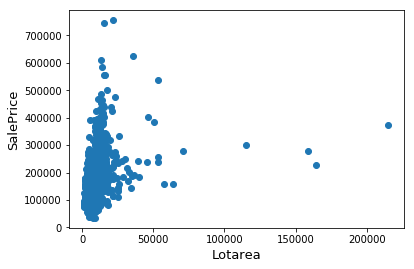

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Lotarea', fontsize=13)
plt.show()

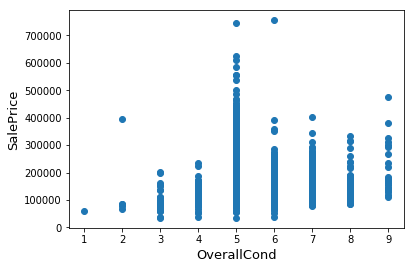

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['OverallCond'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallCond', fontsize=13)
plt.show()

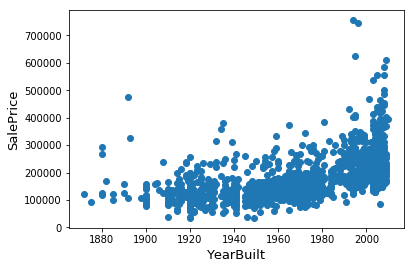

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['YearBuilt'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

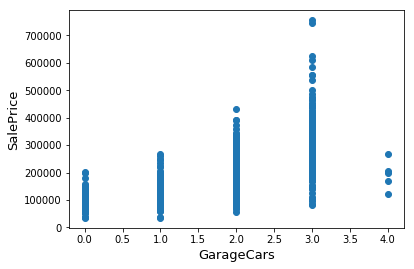

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GarageCars'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

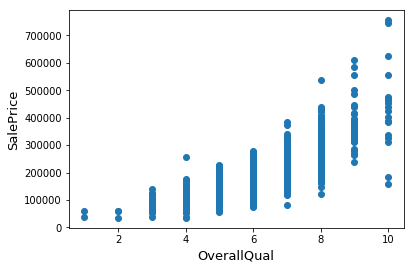

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

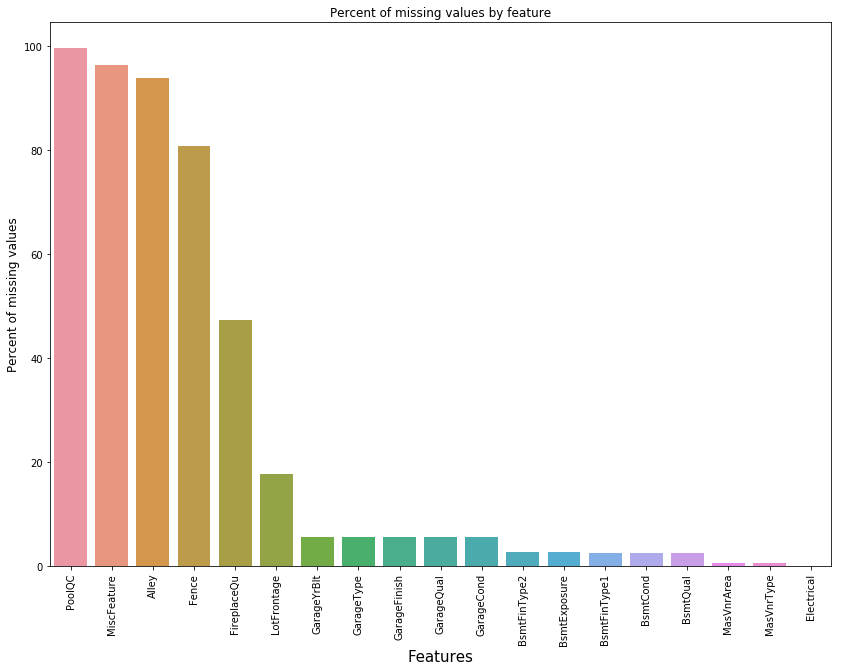

In [8]:
####Number of missing values ########################################
train_num_na = df_train.isnull().sum()
train_data_na = (df_train.isnull().sum() / len(df_train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
train_num_na = train_num_na.drop(train_num_na[train_num_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Percent Missing':train_data_na, 'Number of Missing':train_num_na})
missing_data

f, ax = plt.subplots(figsize=(14, 10))
plt.xticks(rotation='90')
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=12)
plt.title('Percent of missing values by feature', fontsize=12)

####Check there is no NA's
train_null = df_train.isnull().sum()
train_null_2 = train_null.drop(train_null[train_null==0].index).sort_values(ascending=False)
train_null_2

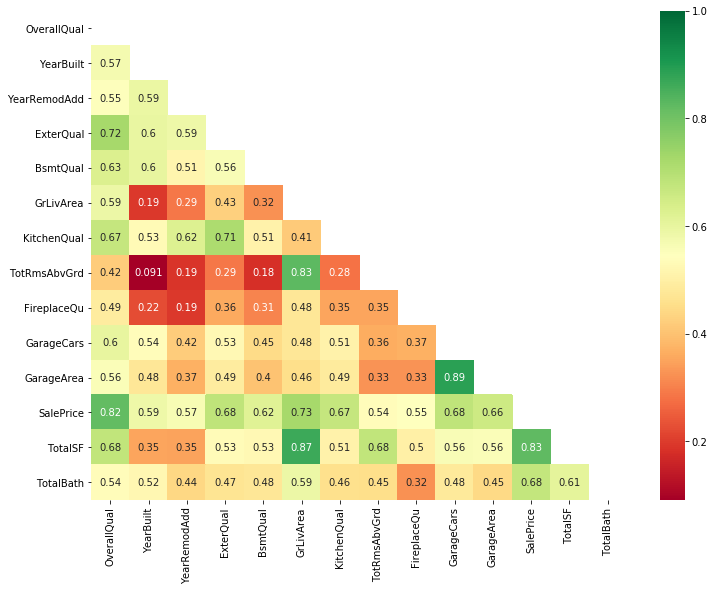

In [59]:
##### Top Correlation with Sale Price
corrmat = df_train[top_corr_features].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
# plt.figure(figsize=(10,10))
plt.subplots(figsize=(12,9))
g = sns.heatmap(corrmat,mask = mask, annot=True, cmap="RdYlGn")


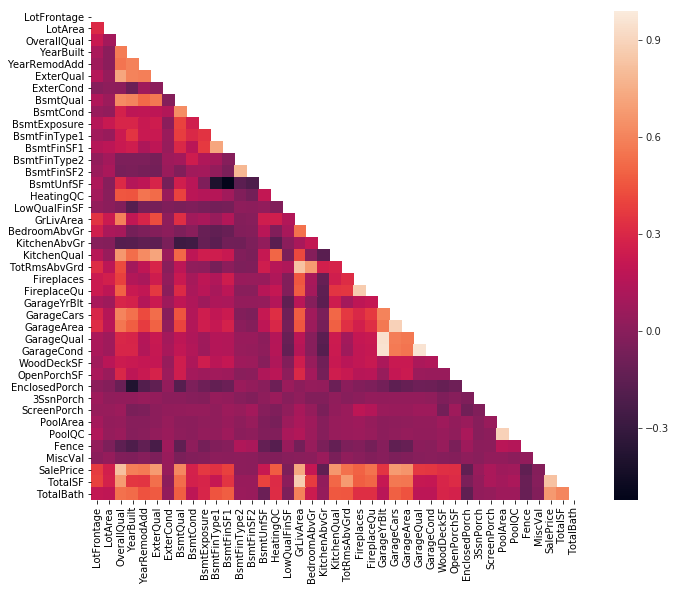

In [49]:
##### Correlation with SalePrice 
df_train[df_train.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)

###Heatmap
corrmap = df_train.corr()
plt.subplots(figsize=(12,9))

mask = np.zeros_like(corrmap)
mask[np.triu_indices_from(mask)] = True

# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corrmap, mask=mask, vmax=0.99, square=True)

## Outliers and Normalize SalePrice

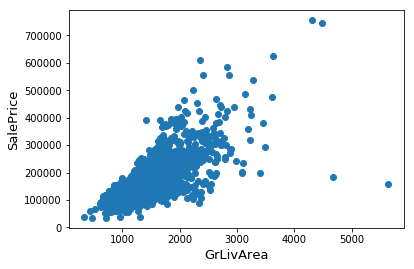

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



 mu = 12.02 and sigma = 0.40



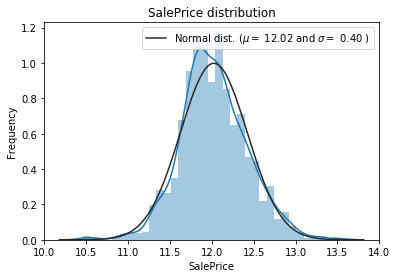

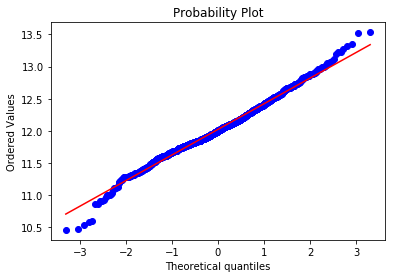

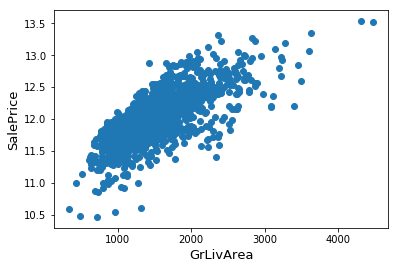

In [13]:
###Remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4500) & \
                                  (df_train['SalePrice']<300000)].index)

### Normalize sale price 
df_train["SalePrice"] = np.log(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm);

### Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

####Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Replace NA's with None or median 

In [14]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")
df_train["Alley"] = df_train["Alley"].fillna("None")
df_train["Fence"] = df_train["Fence"].fillna("None")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

df_train["GarageType"] = df_train["GarageType"].fillna("None")
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")

df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["Electrical"] = df_train["Electrical"].fillna("None")

df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna("None")

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## Replace NA's with None or median 

In [15]:
df_test["PoolQC"] = df_test["PoolQC"].fillna("None")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("None")
df_test["Alley"] = df_test["Alley"].fillna("None")
df_test["Fence"] = df_test["Fence"].fillna("None")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")

df_test["GarageType"] = df_test["GarageType"].fillna("None")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("None")
df_test["GarageQual"] = df_test["GarageQual"].fillna("None")
df_test["GarageCond"] = df_test["GarageCond"].fillna("None")

df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna("None")
df_test["BsmtExposure"] = df_test["BsmtExposure"].fillna("None")
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna("None")
df_test["BsmtCond"] = df_test["BsmtCond"].fillna("None")
df_test["BsmtQual"] = df_test["BsmtQual"].fillna("None")

df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["Electrical"] = df_test["Electrical"].fillna("None")

df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna("None")

df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## Feature Engineering

In [16]:
###Add total square footage
df_train['TotalSF']=df_train['TotalBsmtSF']+df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*df_train['HalfBath'] + \
0.5*df_train['BsmtHalfBath']

#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

### Ordinal to Numerical
df_train['ExterQual']=df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['ExterCond']=df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtQual']=df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtCond']=df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtExposure']=df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_train['BsmtFinType1']=df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['BsmtFinType2']=df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['HeatingQC']=df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['KitchenQual']=df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['FireplaceQu']=df_train['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageQual']=df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageCond']=df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['PoolQC']=df_train['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_train['Fence']=df_train['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})


In [17]:
###Add total square footage
df_test['TotalSF']=df_test['TotalBsmtSF']+df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['TotalBath'] = df_test['FullBath'] + df_test['BsmtFullBath'] + 0.5*df_test['HalfBath'] + \
0.5*df_test['BsmtHalfBath']

#MSSubClass=The building class
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

### Ordinal to Numerical
df_test['ExterQual']=df_test['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['ExterCond']=df_test['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtQual']=df_test['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtCond']=df_test['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtExposure']=df_test['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_test['BsmtFinType1']=df_test['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_test['BsmtFinType2']=df_test['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_test['HeatingQC']=df_test['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['KitchenQual']=df_test['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['FireplaceQu']=df_test['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['GarageQual']=df_test['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['GarageCond']=df_test['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['PoolQC']=df_test['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_test['Fence']=df_test['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})



In [18]:
df_train.shape

(1458, 83)

In [19]:
### Drop Id and Utilities column 
df_train = df_train.drop(['Id', 'Utilities'], axis = 1)
df_train = df_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
                          'FullBath','BsmtFullBath','HalfBath', \
                          'BsmtHalfBath','MasVnrArea'], axis=1)

In [20]:
df_train.shape

(1458, 73)

In [21]:
df_test.shape

(1459, 82)

In [22]:
submission=pd.DataFrame()
submission['Id']=df_test.Id

In [23]:
### Drop unnecessary columns
df_test = df_test.drop(['Id','Utilities'], axis = 1)
df_test = df_test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
                          'FullBath','BsmtFullBath','HalfBath', \
                          'BsmtHalfBath','MasVnrArea'], axis=1)

In [24]:
df_test.shape

(1459, 72)

In [25]:
### Define sale price and features of houses 
sale_price = df_train['SalePrice']
house_features3 = df_train.drop('SalePrice', axis = 1)

## Measure skewness

In [26]:
# from scipy.stats import skew
# numeric_feats = house_features3.dtypes[house_features3.dtypes != "object"].index
# skewed_feats = house_features3[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness

## BoxCox Transformation 

In [27]:
# skewness = skewness[abs(skewness)>0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.5
# for feat in skewed_features:
# #     house_features3[feat] += 1
#     house_features3[feat] = boxcox1p(house_features3[feat], lam)
#     df_test[feat] = boxcox1p(df_test[feat], lam)
# # house_features3[skewed_features] = np.log1p(house_features3[skewed_features])


      

In [28]:
print(house_features3.shape)
print(df_test.shape)

(1458, 72)
(1459, 72)


In [29]:
house_features3['train'] = 1
df_test['train'] = 0
comb = pd.concat([house_features3,df_test], sort=False)

In [30]:
print("Train: ", house_features3.shape)
print("Test: ", df_test.shape)
comb = pd.get_dummies(comb)
house_features3 = comb[comb["train"] == 1]
df_test = comb[comb["train"] == 0]
print("\n")
print("Train: ", house_features3.shape)
print("Test: ", df_test.shape)

Train:  (1458, 73)
Test:  (1459, 73)


Train:  (1458, 273)
Test:  (1459, 273)


In [31]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7           5       2003          2003     Gable  CompShg   
1            6           8       1976          1976     Gable  CompShg   
2            7           5       2001          2002     Gable  CompShg   
3            7           5       1915          1970     Gable  CompShg   
4            8           5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  ExterQual  ExterCond Foundation  \
0     VinylSd     VinylSd    BrkFace          4          3      PConc   
1     MetalSd     MetalSd       None          3          3     CBlock   
2     VinylSd     VinylSd    BrkFace          4          3      PConc   
3     Wd Sdng     Wd Shng       None          3          3     BrkTil   
4     VinylSd     VinylSd    BrkFace          4          3      PConc   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3             1             6         706             1   
1         4         3             4             5         978             1   
2         4         3             2             6         486             1   
3         3         4             1             5         216             1   
4         4         3             3             6         655             1   

   BsmtFinSF2  BsmtUnfSF Heating  HeatingQC CentralAir Electrical  \
0           0        150    GasA          5          Y      SBrkr   
1           0        284    GasA          5          Y      SBrkr   
2           0        434    GasA          5          Y      SBrkr   
3           0        540    GasA          4          Y      SBrkr   
4           0        490    GasA          5          Y      SBrkr   

   LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0       1710             3             1            4   
1             0       1262             3             1            3   
2             0       1786             3             1            4   
3             0       1717             3             1            4   
4             0       2198             4             1            4   

   TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0            0     Attchd       2003.0   
1             6        Typ           1            3     Attchd       1976.0   
2             6        Typ           1            3     Attchd       2001.0   
3             7        Typ           1            4     Detchd       1998.0   
4             9        Typ           1            3     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond PavedDrive  \
0          RFn           2         548           3           3          Y   
1          RFn           2         460           3           3          Y   
2          RFn           2         608           3           3          Y   
3          Unf           3         642           3

## Dummify

In [32]:

house_features3 = pd.get_dummies(house_features3)
df_test = pd.get_dummies(df_test)

In [33]:
house_features3.shape

(1458, 273)

In [34]:
df_test.shape

(1459, 273)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split \
(house_features3, sale_price, test_size=0.2, random_state=111)

## 1. Multiple Linear Regression 

In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print('R^2 is equal to %.3f' %(lm.score(x_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-lm.predict(x_train))**2)))
print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))
print('The model score is %.3f' %(lm.score(x_train, y_train)))
print()

trainRMSE = np.sqrt(mean_squared_error(y_train, lm.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, lm.predict(x_test)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

# print(pd.Series(lm.coef_, index=x_train.columns).sort_values(ascending=False))

R^2 is equal to 0.955
RSS is equal to 8.464
The intercept is 6.031
The model score is 0.955

Train RMSE: 0.085
Test RMSE: 0.139
Diff in RMSE: 0.054


## 2. Ridge

In [37]:
#ridgcv = RidgeCV(alphas=np.linspace(1e-5,1e-4,1e-3,1e-2))
ridgcv = RidgeCV(alphas=[.001, .01, .1, 1, 2, 5, 10, 12, 14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
ridgcv.fit(x_train,y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridgcv.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridgcv.predict(x_test)))

print('The best alpha is %.6f' %(ridgcv.alpha_))
print('The ridge intercept is %.2f' %(ridgcv.intercept_))
# print(pd.Series(abs(ridgcv.coef_), index=x_train.columns).sort_values())
print('The model score is: %.2f' %(ridgcv.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The best alpha is 12.000000
The ridge intercept is 5.90
The model score is: 0.95
Train RMSE: 0.094
Test RMSE: 0.125
Diff in RMSE: 0.031


## 3. Lasso

In [38]:
# lassocv = LassoCV(alphas=np.linspace(0,20,100), normalize=False,
#                       max_iter=10000, n_jobs=-1, cv=100)
lassocv = LassoCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
lassocv.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, lassocv.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test,lassocv.predict(x_test)))

print('The best alpha is: %.6f' %(lassocv.alpha_))
print('The lasso intercept is: %.2f' %(lassocv.intercept_))
# print(pd.Series(lassocv.coef_, index=x_train.columns))
print('The model score is: %.2f' %(lassocv.score(x_train, y_train)))

print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE)) 
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The best alpha is: 0.001000
The lasso intercept is: 5.27
The model score is: 0.94
Train RMSE: 0.101
Test RMSE: 0.122
Diff in RMSE: 0.021


## 4. ElasticNet

In [39]:
# enet = ElasticNetCV(l1_ratio=np.linspace(0.01,1,100), alphas=np.linspace(1e-5,20,1000), max_iter=1000, normalize=False, cv=10, n_jobs=-1)
enet = ElasticNetCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
enet.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=enet.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=enet.predict(x_test)))

print('The best alpha is %.6f' %(enet.alpha_)) 
print('The elastic-net intercept is %.2f' %(enet.intercept_))
print('The model score is %.2f' %(enet.score(x_train, y_train)))
# print(pd.Series(enet.coef_, index=x_train.columns))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.2f' %((testRMSE - trainRMSE)))

The best alpha is 0.001000
The elastic-net intercept is 5.74
The model score is 0.94
Train RMSE: 0.096
Test RMSE: 0.121
Diff in RMSE: 0.02


## 5. Random Forest

In [40]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=10,max_features=0.5, \
                           min_samples_split=2, min_samples_leaf=1,n_jobs=-1, \
                           random_state=111)
# rf = RandomForestRegressor(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
#                           14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
#rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight=(1:0.4, 0:0.6), n_jobs=-1) #alternate
rf.fit(x_train, y_train)
scores = cross_val_score(rf, x_train, y_train, cv=10)
print(scores.mean())

trainRMSE = np.sqrt(mean_squared_error(y_train, rf.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, rf.predict(x_test)))

print('The model score is %.2f' %(rf.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE) )
print('Diff in RMSE: %.3f' %((testRMSE - trainRMSE)))

0.8893862069318661
The model score is 0.98
Train RMSE: 0.057
Test RMSE: 0.139
Diff in RMSE: 0.082


## 6. Gradient Boosting

In [41]:
gbst = GradientBoostingRegressor(alpha=0.2, n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =111)

n_estimators = 50100
gbst.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbst.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, gbst.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, gbst.predict(x_test)))

# print('The best alpha is %.6f' %(gbst.alpha_)) 
print('The model score is %.2f' %(gbst.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.95
Train RMSE: 0.086
Test RMSE: 0.187
Diff in RMSE: 0.101


## 7. Xgboost

In [42]:
import xgboost
### Initial Pass
xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=10.5, reg_lambda=0.3, gamma=0.01,
                           silent=1, random_state =7, nthread = -1) 
xgb.fit(x_train, y_train, verbose=False)
### Make Predictions 
trainRMSE = np.sqrt(mean_squared_error(y_train, xgb.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, xgb.predict(x_test)))

print('The model score is %.2f' %(xgb.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.90
Train RMSE: 0.129
Test RMSE: 0.140
Diff in RMSE: 0.010


## 8. Lightgbm

In [43]:
from lightgbm import LGBMRegressor
import lightgbm 
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.001, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(x_train, y_train)


trainRMSE = np.sqrt(mean_squared_error(y_train, lgb.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, lgb.predict(x_test)))

print('The model score is %.3f' %(lgb.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.545
Train RMSE: 0.270
Test RMSE: 0.270
Diff in RMSE: 0.000


## Submission 

In [44]:
print(house_features3.shape)
print(df_test.shape)

(1458, 273)
(1459, 273)


In [45]:
df_test = df_test.select_dtypes(include=[np.number]).interpolate().dropna()
predictions = enet.predict(df_test)

In [46]:
pd.options.display.float_format = '{:.2f}'.format
#submission['SalePrice'] = np.expm1(predictions)
submission['SalePrice'] = np.exp(predictions)
submission

Id  SalePrice
0     1461  119986.80
1     1462  154568.73
2     1463  176897.95
3     1464  200768.27
4     1465  191916.96
5     1466  169279.62
6     1467  181592.38
7     1468  161727.83
8     1469  191616.44
9     1470  119223.13
10    1471  198842.28
11    1472  104360.00
12    1473   97597.06
13    1474  149210.95
14    1475  120320.00
15    1476  356159.74
16    1477  252288.79
17    1478  269659.61
18    1479  270899.82
19    1480  501797.96
20    1481  336788.80
21    1482  210937.44
22    1483  174456.53
23    1484  167876.55
24    1485  184055.37
25    1486  195796.26
26    1487  315596.73
27    1488  227483.72
28    1489  194232.34
29    1490  232720.73
...    ...        ...
1429  2890   81279.77
1430  2891  139094.12
1431  2892   40761.51
1432  2893   63834.41
1433  2894   54217.83
1434  2895  313281.29
1435  2896  277756.37
1436  2897  195687.38
1437  2898  154359.93
1438  2899  200383.05
1439  2900  162839.40
1440  2901  191290.32
1441  2902  198849.37
1442  2903  327674.88
1443  2904  354274.94
1444  2905   80234.76
1445  2906  191741.71
1446  2907  109166.91
1447  2908  132430.64
1448  2909  153230.37
1449  2910   80457.91
1450  2911   84748.73
1451  2912  144268.70
1452  2913   83213.05
1453  2914   76069.48
1454  2915   84273.80
1455  2916   82969.71
1456  2917  170869.00
1457  2918  110882.89
1458  2919  220509.64

[1459 rows x 2 columns]

In [47]:
submission.to_csv('submission1.csv', index=False)


In [ ]:
#Your submission scored 0.12775, which is an improvement of your previous score of 0.12866. 